In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from tensorflow.keras import datasets, layers, models


In [1]:
(training_images, training_labels), (testing_images, testing_labels)= datasets.cifar10.load_data()
training_images, testing_images = training_images /255, testing_images/255

class_names = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
    
#plt.show()

#training_images= training_images[:20000]
#trainging_labels= training_labels[:20000]
#testing_images= testing_images[:4000]
#testing_labels= testing[:4000]

model= models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

loss, accuracy = model.evaluate(testing_images, testing_labels)
model.save('image_classifier.model')


NameError: name 'datasets' is not defined

1/1 [==============================] - 0s 25ms/step
prediction
Bird


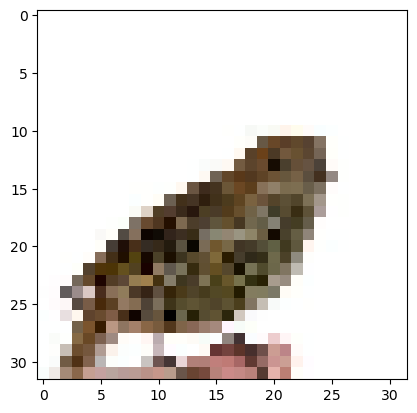

In [31]:
nModel =  models.load_model('image_classifier.model')
img = cv.imread('bird2.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction = model.predict(np.array([img])/255)
index = np.argmax(prediction)
print('prediction')
print(class_names[index])

hello world
